In [1]:
import pandas as pd
import numpy as no
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Sparsh
[nltk_data]     Mahajan\anaconda3\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
stop = set(stopwords.words('english'))

In [4]:
stop = stop.union({'said' , 'would' , 'could' , 'told' , 'also' , 'one' , 'two' , 'mr' , 'new'
                  , 'year'})

In [6]:
import glob

In [7]:
path = r"C:\Users\Sparsh Mahajan\Downloads\archive\bbc-fulltext (document classification)\bbc\*\*"
files = glob.glob(path)
df = pd.DataFrame()
df['Type']=  [x.split("\\")[-2] for x in files]
text = []
for file in files:
    with open(file , 'r') as f:
        text.append(f.read())
df['text']= text

In [11]:
vectorizer =TfidfVectorizer(stop_words =list( stop))

In [12]:
X = vectorizer.fit_transform(df['text'])

In [15]:
nmf = NMF(
        n_components=10 ,
        beta_loss='kullback-leibler' , 
        solver='mu' ,
        random_state = 42,
)
    
    

In [16]:
nmf.fit(X)

NMF(beta_loss='kullback-leibler', n_components=10, random_state=42, solver='mu')

In [17]:
def plot_top_words(model, feature_names, n_top_words=10):
 

  # Create a subplot grid with 2 rows and 5 columns, set the figure size, and share x-axis labels
  fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)

  # Flatten the 2D axes array into a 1D array for easier iteration
  axes = axes.flatten()

  # Iterate over each topic in the NMF model
  for topic_idx, topic in enumerate(model.components_):
    # Sort the topic weights (descending order) and select the indices of the top n_top_words features
    top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
    # Extract the corresponding feature names from the feature_names list
    top_features = [feature_names[i] for i in top_features_ind]
    # Extract the weights of the top features
    weights = topic[top_features_ind]

    # Get the current axis for plotting
    ax = axes[topic_idx]

    # Create a horizontal bar chart to visualize feature weights
    ax.barh(top_features, weights, height=0.7)

    # Set the title of the subplot with the topic number
    ax.set_title(f"Topic {topic_idx + 1}", fontdict={"fontsize": 30})

    # Invert the y-axis to display the most important word at the top
    ax.invert_yaxis()

    # Set tick parameters for labels and font size
    ax.tick_params(axis="both", which="major", labelsize=20)

    # Hide the top, right, and left spines of the subplot for a cleaner look
    for spine in "top right left".split():
      ax.spines[spine].set_visible(False)

  # Set a common title for the entire figure as 'NMF'
  fig.suptitle('NMF', fontsize=40)

  # Adjust subplot layout paddings to improve readability
  plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)

  # Display the plot
  plt.show()

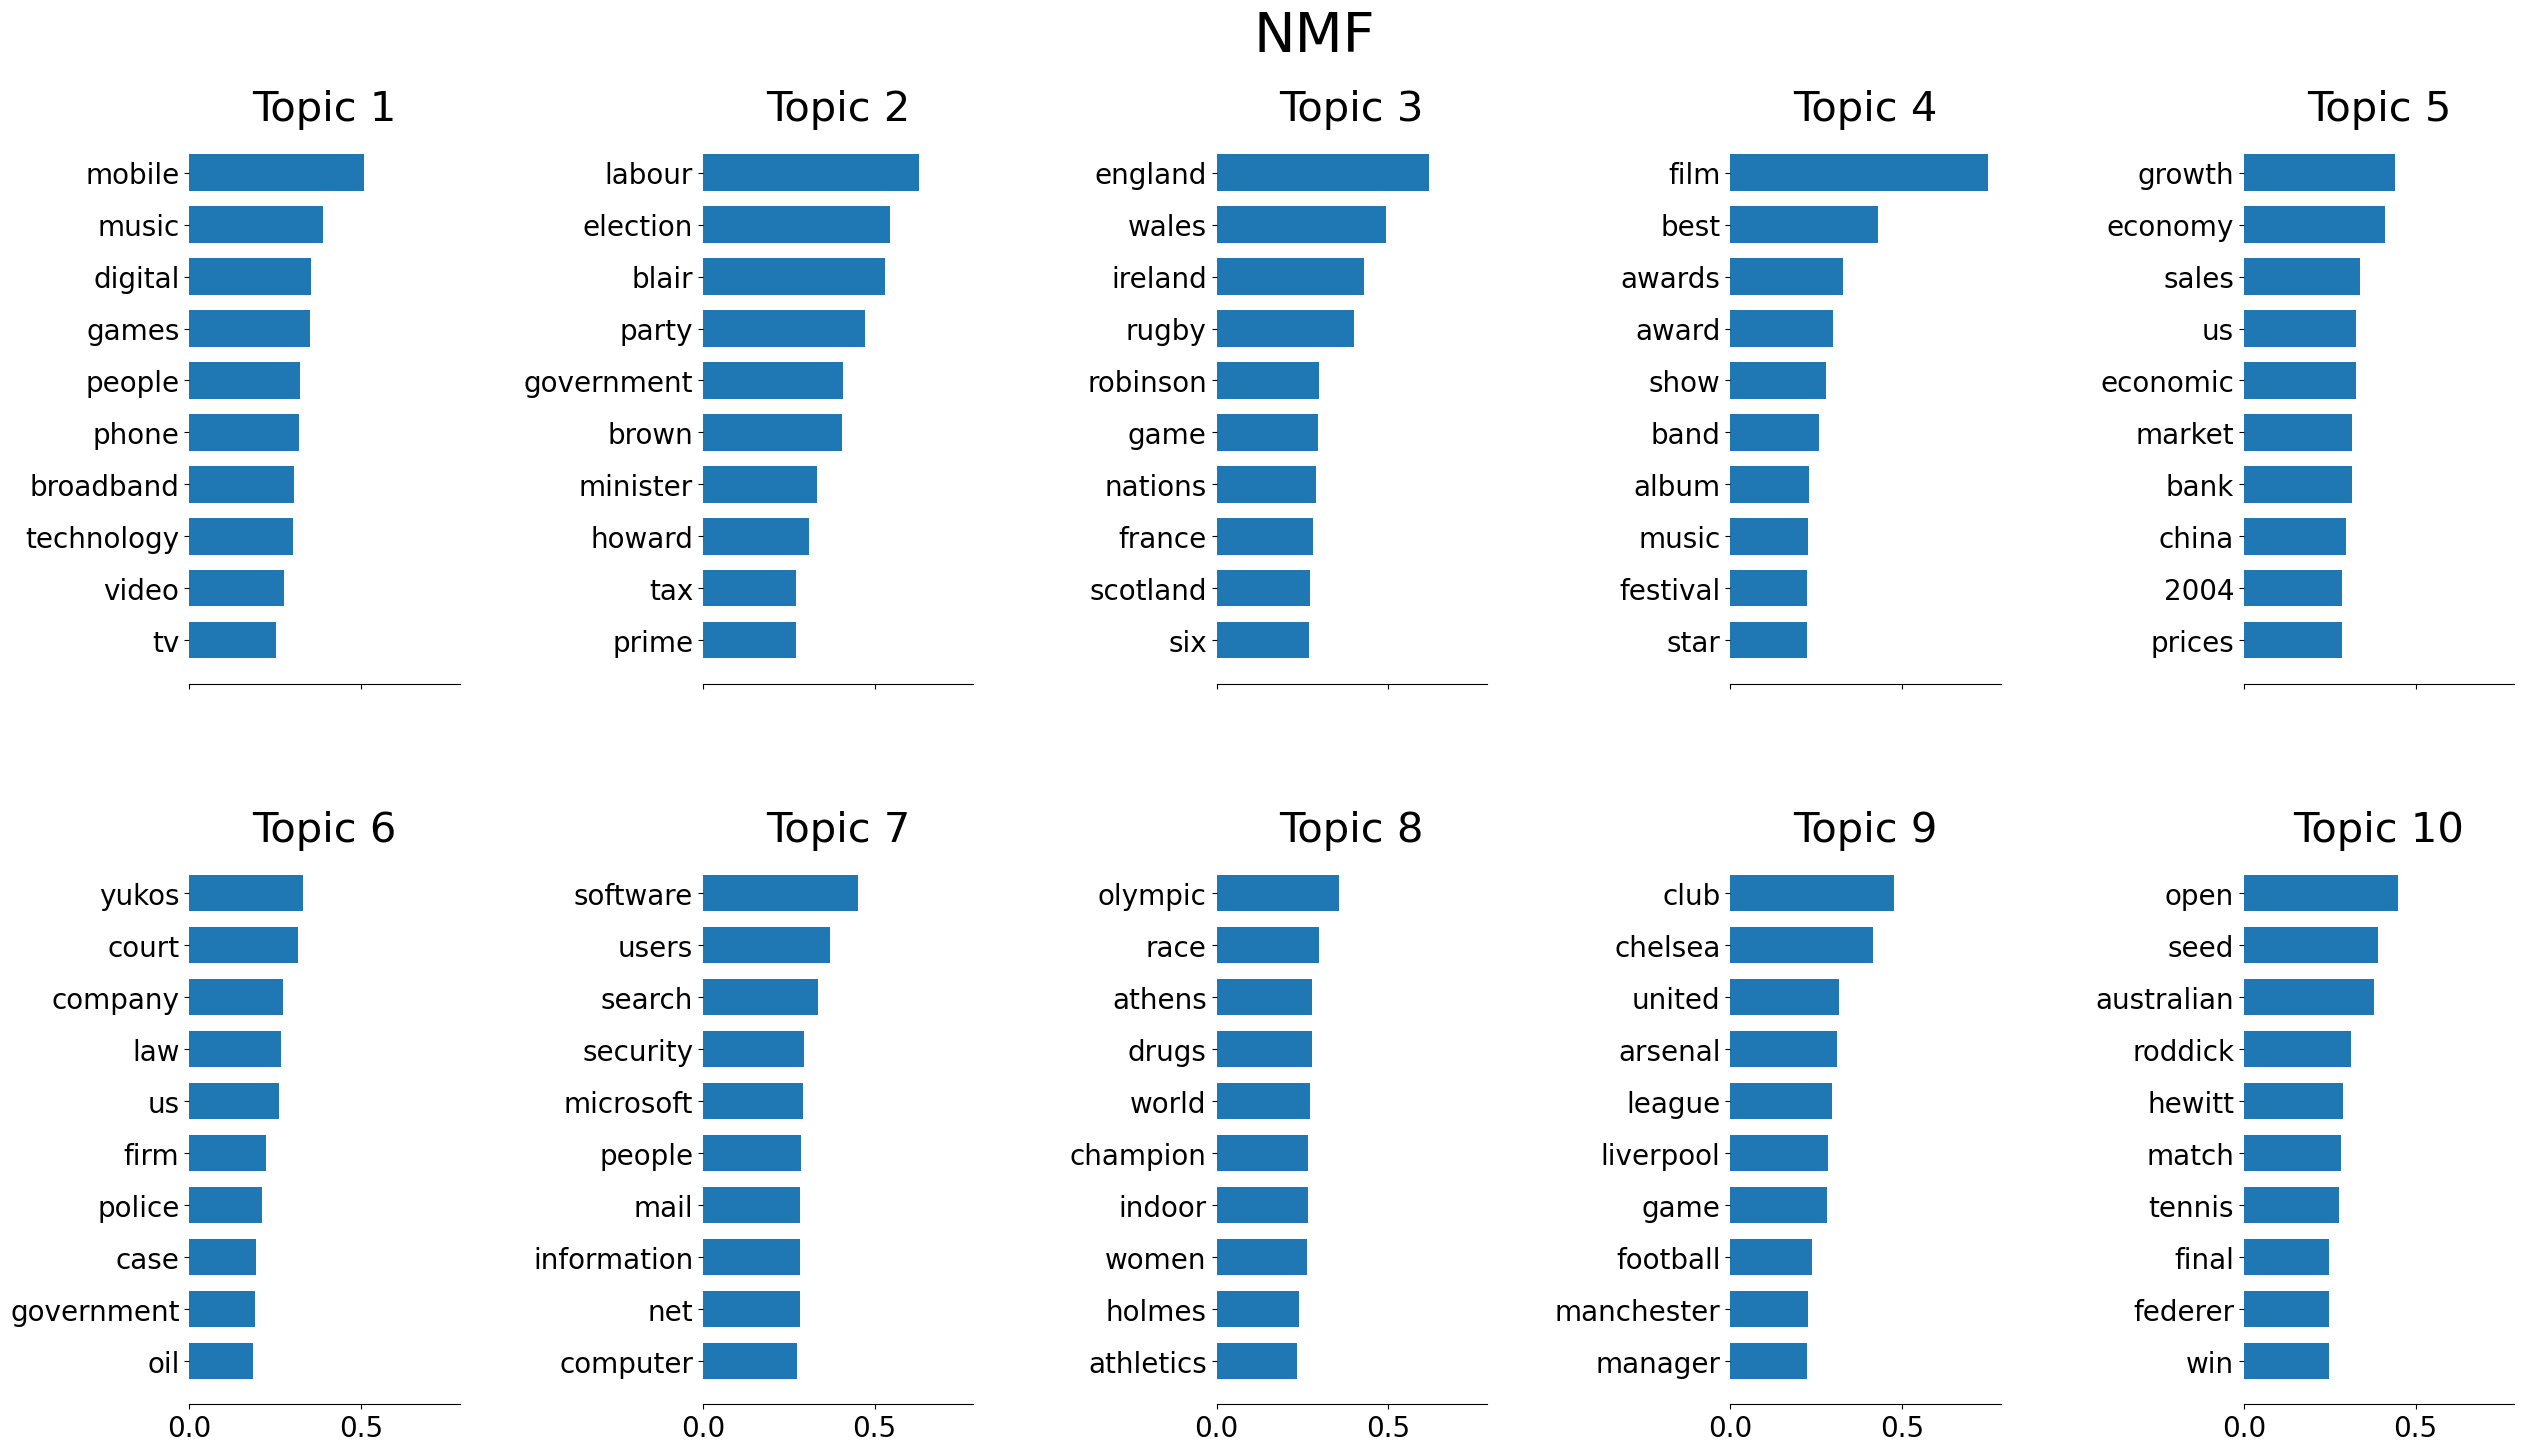

In [18]:
plot_top_words(nmf , vectorizer.get_feature_names_out() )

In [19]:
    Z =nmf.transform(X)

In [23]:
import numpy as np

Text(0.5, 1.0, 'True label : sport')

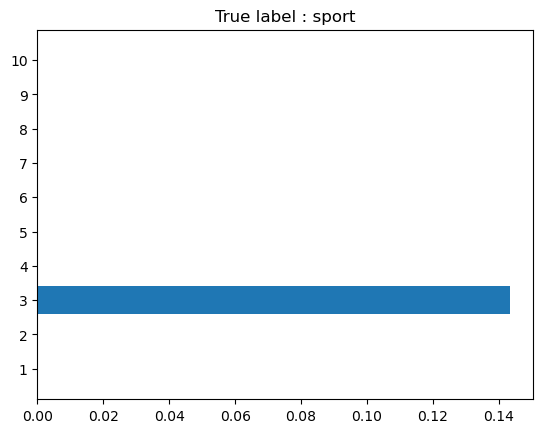

In [27]:
np.random.seed(0)
i = np.random.choice(len(df))
z = Z[i]
topics = np.arange(10)+1
fg , ax =  plt.subplots()
ax.barh(topics , z)
ax.set_yticks(topics)
ax.set_title('True label : %s'  % df.iloc[i]['Type'])

In [30]:
print(df.iloc[i]['text'])

Charvis set to lose fitness bid

Flanker Colin Charvis is unlikely to play any part in Wales' final two games of the Six Nations.

Charvis has missed all three of Wales' victories with an ankle injury and his recovery has been slower than expected. "He will not figure in the Scotland game and is now thought unlikely to be ready for the final game," said Wales physio Mark Davies. Sonny Parker is continuing to struggle with a neck injury, but Hal Luscombe should be fit for the Murrayfield trip. Centre Parker has only a "slim chance" of being involved against the Scots on 13 March, so Luscombe's return to fitness after missing the France match with hamstring trouble is a timely boost.

Said Wales assistant coach Scott Johnson: "We're positive about Hal and hope he'll be raring to go. "He comes back into the mix again, adds to the depth and gives us other options. " Replacement hooker Robin McBryde remains a doubt after picking up knee ligament damage in Paris last Saturday. "We're getting